# HW 9

This assignment covers gradient boosting classifier and all fundamental concepts required for completing a project

**DO NOT ERASE MARKDOWN CELLS AND INSTRUCTIONS IN YOUR HW submission**
  * **Q** - QUESTION
  * **A** - Where to input your answer

## Instructions

Keep the following in mind for all notebooks you develop:
* Structure your notebook. 
* Use headings with meaningful levels in Markdown cells, and explain the questions each piece of code is to answer or the reason it is there.
* Make sure your notebook can always be rerun from top to bottom.
* Please start working on this assignment as soon as possible. If you are a beginner in Python this might take a long time. One of the objectives of this assignment is to help you learn python and scikit-learn package. 
* See [README.md](README.md) for homework submission instructions

## Related Tutorials

### Refreshers
* [Intro to Machine Learning w scikit-learn](https://scikit-learn.org/stable/tutorial/basic/tutorial.html)
* [A tutorial on statistical-learning for scientific data processing](https://scikit-learn.org/stable/tutorial/statistical_inference/index.html#stat-learn-tut-index)
 
### Classification Approaches
* [Logistic Regression with Sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
* [KNN with sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
* [Support Vector machine example](https://scikit-learn.org/stable/auto_examples/exercises/plot_iris_exercise.html#sphx-glr-auto-examples-exercises-plot-iris-exercise-py)
* [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html?highlight=svc#sklearn.svm.SVC)
* [Bagging Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html)
* [Gradient Boosting Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html)
  
### Modeling   
* [Cross-validation](https://scikit-learn.org/stable/modules/cross_validation.html)
* [Plot Confursion Matrix with Sklearn](https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html)
* [Confusion Matrix Display](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics)# HW 9

This assignment covers gradient boosting classifier and all fundamental concepts required for completing a project

**DO NOT ERASE MARKDOWN CELLS AND INSTRUCTIONS IN YOUR HW submission**
  * **Q** - QUESTION
  * **A** - Where to input your answer

## Instructions

Keep the following in mind for all notebooks you develop:
* Structure your notebook. 
* Use headings with meaningful levels in Markdown cells, and explain the questions each piece of code is to answer or the reason it is there.
* Make sure your notebook can always be rerun from top to bottom.
* Please start working on this assignment as soon as possible. If you are a beginner in Python this might take a long time. One of the objectives of this assignment is to help you learn python and scikit-learn package. 
* See [README.md](README.md) for homework submission instructions

## Related Tutorials

### Refreshers
* [Intro to Machine Learning w scikit-learn](https://scikit-learn.org/stable/tutorial/basic/tutorial.html)
* [A tutorial on statistical-learning for scientific data processing](https://scikit-learn.org/stable/tutorial/statistical_inference/index.html#stat-learn-tut-index)
 
### Classification Approaches
* [Logistic Regression with Sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
* [KNN with sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
* [Support Vector machine example](https://scikit-learn.org/stable/auto_examples/exercises/plot_iris_exercise.html#sphx-glr-auto-examples-exercises-plot-iris-exercise-py)
* [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html?highlight=svc#sklearn.svm.SVC)
* [Bagging Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html)
* [Gradient Boosting Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html)
  
### Modeling   
* [Cross-validation](https://scikit-learn.org/stable/modules/cross_validation.html)
* [Plot Confursion Matrix with Sklearn](https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html)
* [Confusion Matrix Display](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics)

## Part 0: Import Libraries, Load and explore dataset

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MaxAbsScaler, MinMaxScaler
import json
import lightgbm as lgbm
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier

**Q1** Get training data from the dataframe
1. Load ```HW9_data.csv``` from ```data``` folder into the dataframe ```df```
2. Print the head of the dataframe
3. Print the shape of the dataframe
4. Print the info of the dataframe
5. Print the description of the dataframe

**A1** Fill the cell block provided and/or add new cells if needed to answer the question.

In [2]:
df = pd.read_csv("data/HW9_data.csv")

In [3]:
print("HEAD\n", df.head(), "\n")
print("SHAPE\n", df.shape, "\n")
print("INFO\n", df.info(), "\n")
print("DESCRIBE\n", df.describe())

HEAD
    Unnamed: 0         UTC  Temperature  Humidity  TVOC  eCO2  Raw H2  \
0           0  1654733331       20.000     57.36     0   400   12306   
1           1  1654733332       20.015     56.67     0   400   12345   
2           2  1654733333       20.029     55.96     0   400   12374   
3           3  1654733334       20.044     55.28     0   400   12390   
4           4  1654733335       20.059     54.69     0   400   12403   

   Raw Ethanol  Pressure  PM1.0  PM2.5  NC0.5  NC1.0  NC2.5  CNT  Fire Alarm  
0        18520   939.735    0.0    0.0    0.0    0.0    0.0    0           0  
1        18651   939.744    0.0    0.0    0.0    0.0    0.0    1           0  
2        18764   939.738    0.0    0.0    0.0    0.0    0.0    2           0  
3        18849   939.736    0.0    0.0    0.0    0.0    0.0    3           0  
4        18921   939.744    0.0    0.0    0.0    0.0    0.0    4           0   

SHAPE
 (62630, 16) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62630 entries,

## Part 1: Data Cleaning, Normalization and EDA

**Q2** Check and Drop Null/NA values
1. Remove the ```Unnamed: 0 and UTC``` column from the dataframe ```df```.
2. Check if there is any ```null``` and ```NaN``` values in the dataset - if so, remove them. 

**A2** Fill the cell block provided and/or add new cells if needed to answer the question.

In [4]:
df.drop(columns = ['Unnamed: 0', 'UTC'], inplace = True)

In [5]:
df.isnull().any().sum()

0

In [6]:
df.isna().any().sum()

0

**Q3** Count Class Distribution
1. Check the value counts for target column ```Fire Alarm```
2. Use Pie plot from _matplotlib_ to visualize the distribution of the target class.

**A3** Fill the cell block provided and/or add new cells if needed to answer the question.

In [7]:
df['Fire Alarm'].value_counts()

1    44757
0    17873
Name: Fire Alarm, dtype: int64

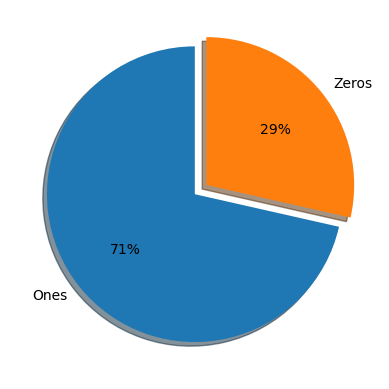

In [8]:
labels = 'Ones', 'Zeros'
explode = [0, 0.1]
plt.pie(df['Fire Alarm'].value_counts(), explode = explode, labels = labels, 
        startangle = 90, shadow = True, autopct='%.0f%%')
plt.show()

**Q4** Find Pearson Correlation in Dataset
1. Plot pearson correlation heatmap from the dataframe ```df```.
2. Write a block of code which will pick **8 columns** with the highest correlation with the ```Fire Alarm``` column. Save the column names in a variable ```largest_8```.
3. Write a block of code which will pick **5 columns** which have smallest correlation with the  ```Fire Alarm```. Save the column names in a variable ```smallest_5```.

**A4** Fill the cell blocks below, Create new cell as per your necessary

<AxesSubplot:>

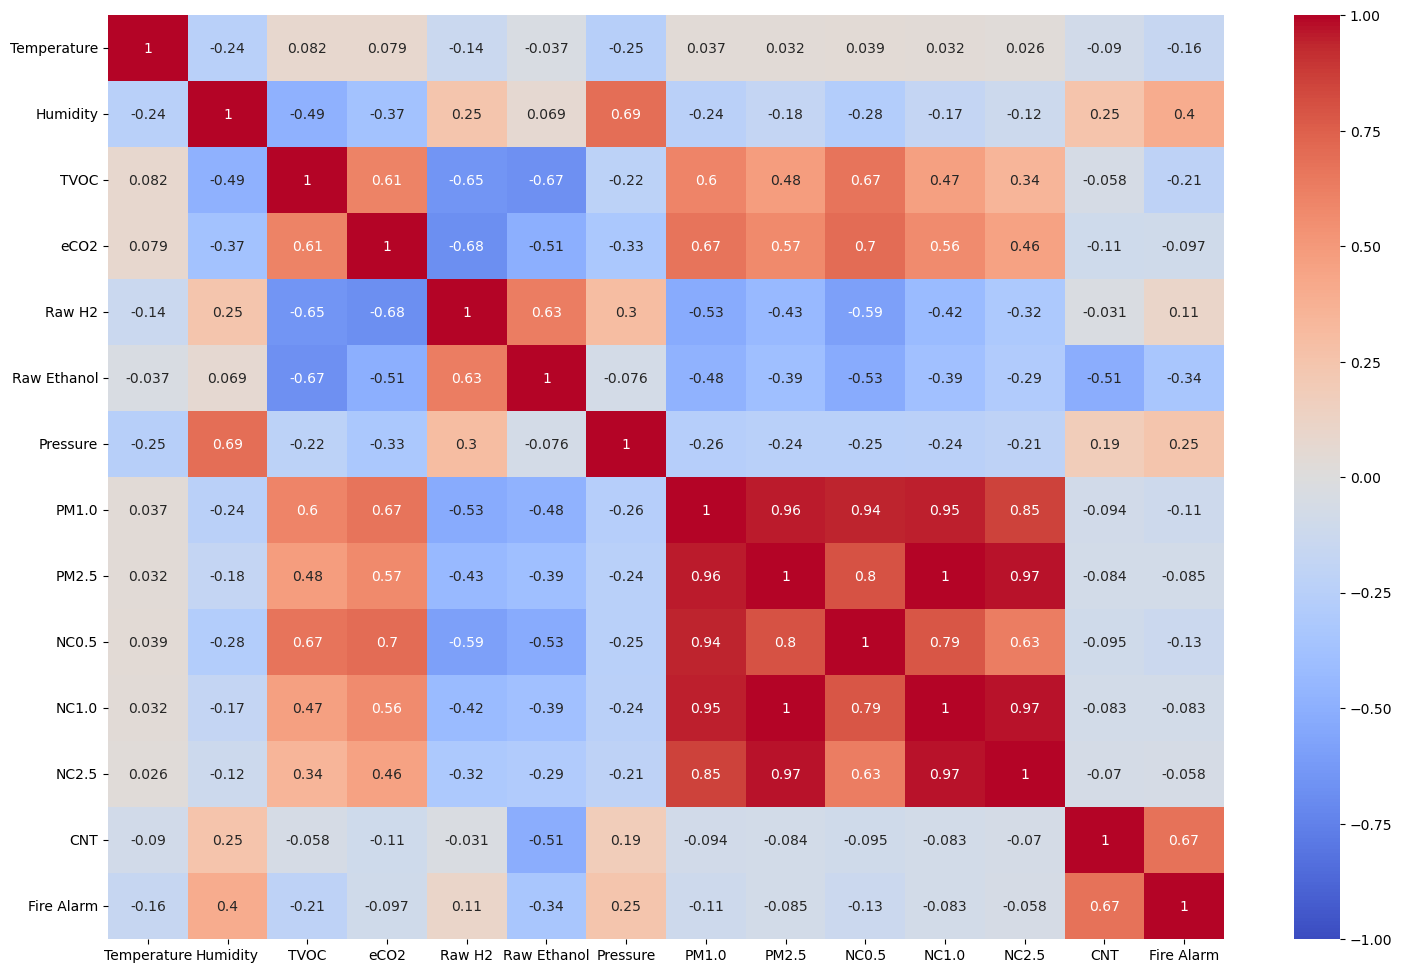

In [9]:
plt.figure(figsize = (18, 12))
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm', vmin = -1)

In [10]:
largest_8 = df[['CNT', 'Humidity', 'Pressure', 'Raw H2', 'Raw Ethanol', 'TVOC', 'Temperature', 'NC0.5']]

In [11]:
smallest_5 = df[['eCO2', 'PM1.0','PM2.5', 'NC1.0', 'NC2.5']]

**Q5** Split X and Y from dataframe

1. Assign ```Fire Alarm``` values to dataframe ```Y```
2. Assign top 8 columns from the previous question stored in **largest_5** to dataframe ```X```
3. Use _MinMaxScaler_ from _sklearn.preprocessing_ to normalize the dataframe ```X```.
4. Print the head of the dataframe after normalization.

**A5** Fill the cell block provided and/or add new cells if needed to answer the question.


In [12]:
Y = df['Fire Alarm']
X = largest_8

In [13]:
minmax = MinMaxScaler()
minmax.fit(X)
X = minmax.fit_transform(X)

**Q6** Plot dataset in 2D Graph

1. Create a random subset of the dataframe ```df``` with 15,000 rows.
2. Use this new subset to plot the dataframe in a 2-D graph. Use any method of your choice. Justify it in the comments. 

**A6** Fill the cell block provided and/or add new cells if needed to answer the question.


In [14]:
np.random.seed(58)
rndperm = np.random.permutation(df.shape[0])
N = 15000
data_subset_df = df.loc[rndperm[:N], :].copy()
#subset_y = data_subset_df['Fire Alarm']
#subset_x = data_subset_df.drop(columns = 'Fire Alarm', inplace = True)

In [15]:
from sklearn.manifold import TSNE
# I believe we should use TSNE because it is good at reducing the dimensionality of a dataframe.
#in this case because we want a 2D graph, I think reducing it to X and Y seems appropriate
# Then we can use a scatterplot or some other graph to make it look pretty

tsne = TSNE(n_components = 2, verbose = 1, perplexity = 40, n_iter = 300)
tsne_results = tsne.fit_transform(data_subset_df)
data_subset_df['tsne-2d-zero'] = tsne_results[:,0]
data_subset_df['tsne-2d-one'] = tsne_results[:,1]

/Users/jeffboerger/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/jeffboerger/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 15000 samples in 0.010s...
[t-SNE] Computed neighbors for 15000 samples in 0.747s...
[t-SNE] Computed conditional probabilities for sample 1000 / 15000
[t-SNE] Computed conditional probabilities for sample 2000 / 15000
[t-SNE] Computed conditional probabilities for sample 3000 / 15000
[t-SNE] Computed conditional probabilities for sample 4000 / 15000
[t-SNE] Computed conditional probabilities for sample 5000 / 15000
[t-SNE] Computed conditional probabilities for sample 6000 / 15000
[t-SNE] Computed conditional probabilities for sample 7000 / 15000
[t-SNE] Computed conditional probabilities for sample 8000 / 15000
[t-SNE] Computed conditional probabilities for sample 9000 / 15000
[t-SNE] Computed conditional probabilities for sample 10000 / 15000
[t-SNE] Computed conditional probabilities for sample 11000 / 15000
[t-SNE] Computed conditional probabilities for sample 12000 / 15000
[t-SNE] Computed conditional probabilities for sa

<AxesSubplot:xlabel='tsne-2d-zero', ylabel='tsne-2d-one'>

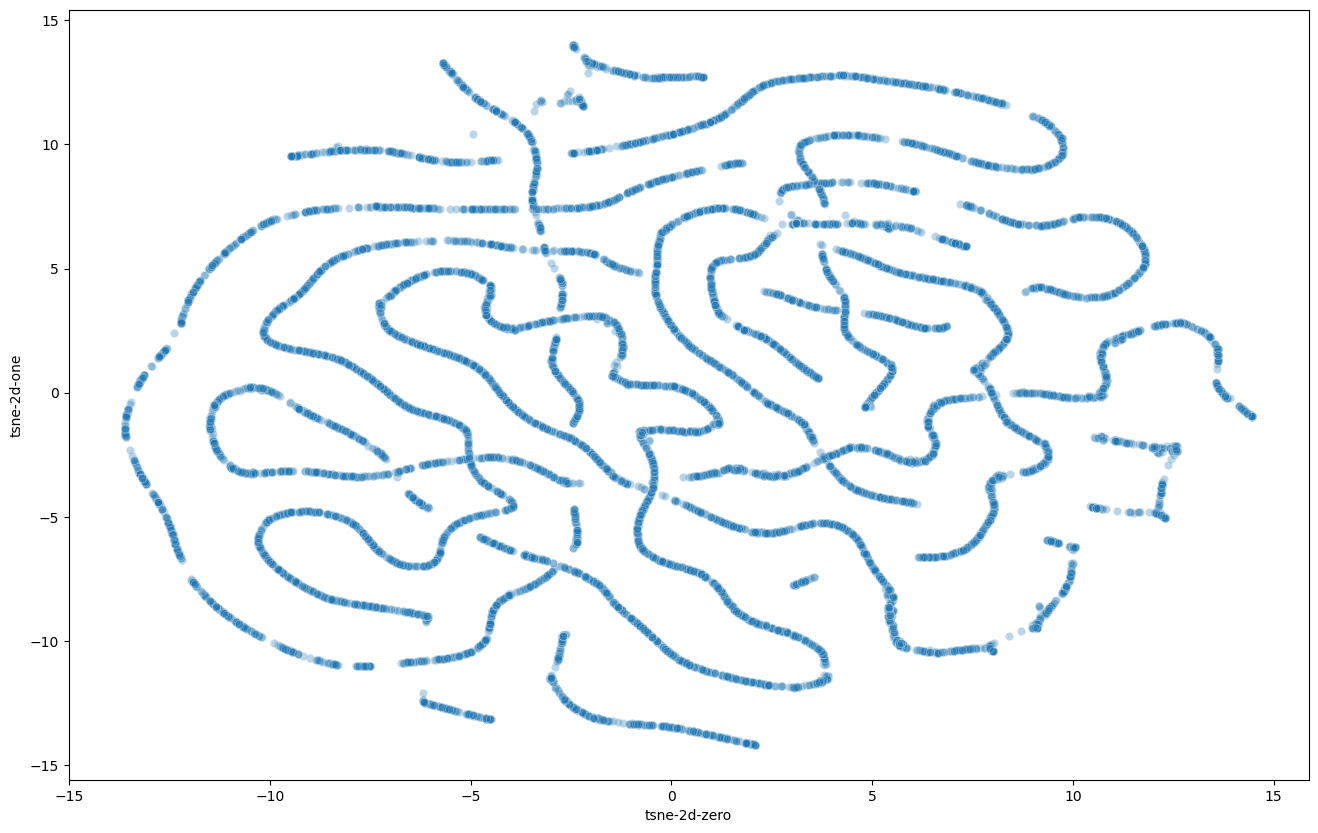

In [16]:
plt.figure(figsize = (16, 10))
sns.scatterplot(
    x = 'tsne-2d-zero', y = 'tsne-2d-one',
    data = data_subset_df,
    legend = 'full',
    alpha = .3)

## Part 2: Split dataset and Classification Model

**Q7** Use of the Gradient Boosting classifier 
1. Use sklearn train_test_split and split the dataset into 80:20.
2. Now create a gradient boosting classifier model from sklearn. 
3. For each of the ```learning_rate``` from the set ```[0.05, 0.1, 0.25, 0.5, 0.75, 1]```
  * Fit the model with the train data.
  * Predict the values with the test data
  * Calculate the test MSE. 
  * Get the score from the model using test data.
  * Compare the scores on the test data using confusion matrix

**A7** Fill the cell block provided and/or add new cells if needed to answer the question.

In [17]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size = .2, random_state = 1958)

In [18]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import ConfusionMatrixDisplay

# I tried putting this in a loop, but the output would not print in order, the matrix display
#always printed below the rest of the data.
gb1 = GradientBoostingClassifier(learning_rate = .05)
gb2 = GradientBoostingClassifier(learning_rate = .1)
gb3 = GradientBoostingClassifier(learning_rate = .25)
gb4 = GradientBoostingClassifier(learning_rate = .5)
gb5 = GradientBoostingClassifier(learning_rate = .75)
gb6 = GradientBoostingClassifier(learning_rate = 1)

gb1.fit(xtrain, ytrain)
gb2.fit(xtrain, ytrain)
gb3.fit(xtrain, ytrain)
gb4.fit(xtrain, ytrain)
gb5.fit(xtrain, ytrain)
gb6.fit(xtrain, ytrain)

pred1 = gb1.predict(xtest)
pred2 = gb2.predict(xtest)
pred3 = gb3.predict(xtest)
pred4 = gb4.predict(xtest)
pred5 = gb5.predict(xtest)
pred6 = gb6.predict(xtest)

mse1 = mean_squared_error(ytest, pred1)
mse2 = mean_squared_error(ytest, pred2)
mse3 = mean_squared_error(ytest, pred3)
mse4 = mean_squared_error(ytest, pred4)
mse5 = mean_squared_error(ytest, pred5)
mse6 = mean_squared_error(ytest, pred6)

acc1 = gb1.score(xtest, ytest)
acc2 = gb2.score(xtest, ytest)
acc3 = gb3.score(xtest, ytest)
acc4 = gb4.score(xtest, ytest)
acc5 = gb5.score(xtest, ytest)
acc6 = gb6.score(xtest, ytest)

Learning Rate: .05
MSE:  0.0
Acc:  1.0


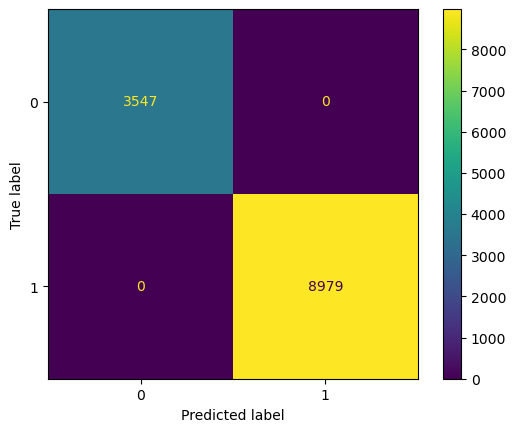

In [19]:
print("Learning Rate: .05")
print("MSE: ", mse1)
print("Acc: ", acc1)
print(ConfusionMatrixDisplay.from_estimator(gb1, xtest, ytest))

Learning Rate: .01
MSE:  0.0
Acc:  1.0


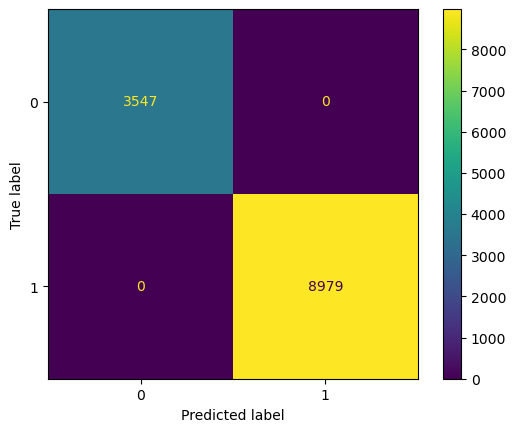

In [20]:
print("Learning Rate: .01")
print("MSE: ", mse2)
print("Acc: ", acc2)
print(ConfusionMatrixDisplay.from_estimator(gb2, xtest, ytest))

Learning Rate: .25
MSE:  0.0
Acc:  1.0


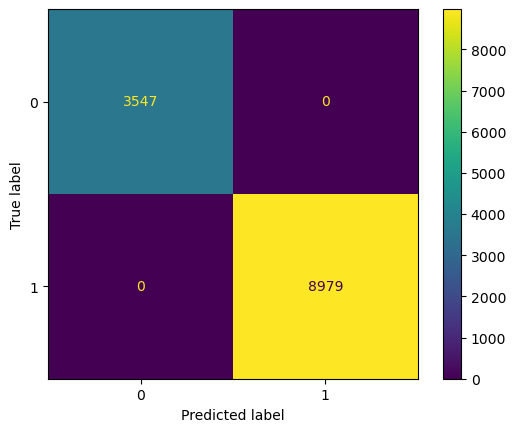

In [21]:
print("Learning Rate: .25")
print("MSE: ", mse3)
print("Acc: ", acc3)
print(ConfusionMatrixDisplay.from_estimator(gb3, xtest, ytest))

Learning Rate: .5
MSE:  0.0
Acc:  1.0


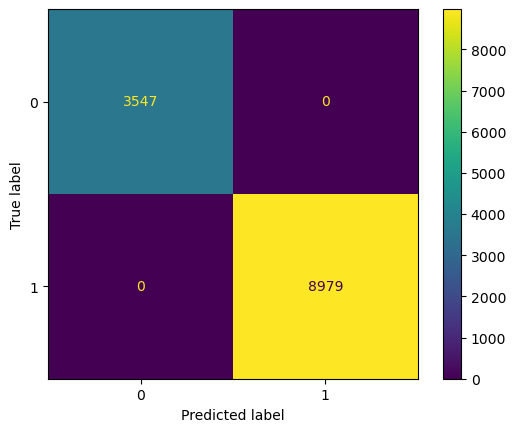

In [22]:
print("Learning Rate: .5")
print("MSE: ", mse4)
print("Acc: ", acc4)
print(ConfusionMatrixDisplay.from_estimator(gb4, xtest, ytest))

Learning Rate: .75
MSE:  0.0
Acc:  1.0


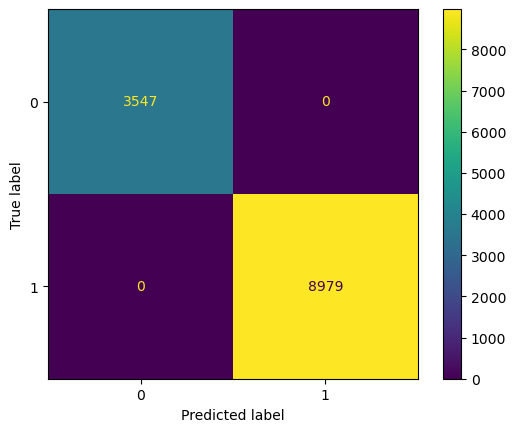

In [23]:
print("Learning Rate: .75")
print("MSE: ", mse5)
print("Acc: ", acc5)
print(ConfusionMatrixDisplay.from_estimator(gb5, xtest, ytest))

Learning Rate: 1
MSE:  0.0
Acc:  1.0


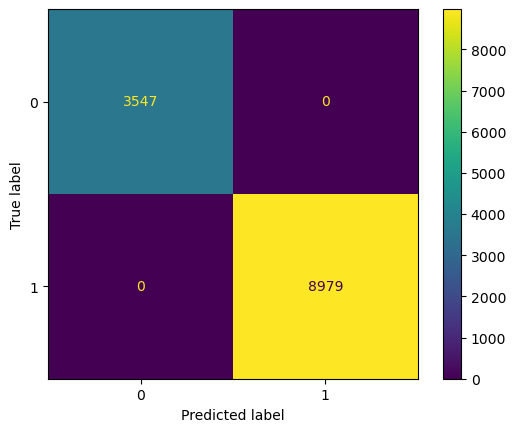

In [24]:
print("Learning Rate: 1")
print("MSE: ", mse6)
print("Acc: ", acc6)
print(ConfusionMatrixDisplay.from_estimator(gb6, xtest, ytest))

**Q8** Lets use the XGBoost classifier on the dataset. 

1. Now, create a XGBoost classifier from the xgboost library. If not installed, use (pip install xgboost) for the installation.
2.  Pass the value for  ```objective  & random_state parameter``` during the model creation.
3. Fit the model with the train data
4. Predict the values with the test data
5. Print the score of the model on test data
5. Calculate the test MSE 

**A8** Replace ??? with code in the code cell below

In [25]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor(objective = 'reg:linear', random_state = 58)
xgb_model.fit(xtrain, ytrain)
y_pred = xgb_model.predict(xtest)
print("Score: ", xgb_model.score(xtest, ytest))
print("MSE: ", mean_squared_error(ytest, y_pred))

[11:22:42] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
Score:  0.9992529920657091
MSE:  0.00015163154495503411
